# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [2]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [3]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [4]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [5]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Data Size
df.shape

(48842, 15)

In [7]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [25]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [26]:
#no2
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [28]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

#imputasi dengan modus
df.fillna(df.mode()['workclass'][0], inplace=True)
df.fillna(df.mode()['occupation'][0], inplace=True)
df.fillna(df.mode()['native-country'][0], inplace=True)

#cek masih ada yg null/tidak
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [29]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [38]:
#cek isi
print(df['workclass'].unique())
print(df['education'].unique())
print(df['marital-status'].unique())
print(df['occupation'].unique())
print(df['relationship'].unique())
print(df['race'].unique())
print(df['sex'].unique())
print(df['native-country'].unique())
print(df['income'].unique())

['State-gov' 'Self-emp-not-inc' 'Others' 'Federal-gov' 'Local-gov'
 'Self-emp-inc']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Others'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Others']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' 'Others' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwa

In [39]:
#peneyesuaian
df['workclass'] = df['workclass'].replace(['?', 'Without-pay', 'Never-worked', 'Private'], 'Others')
df['occupation'] = df['occupation'].replace(['?', 'Private'], 'Others')
df['relationship'] = df['relationship'].replace(['Other-relative'], 'Others')
df['race'] = df['race'].replace(['Other'], 'Others')
df['native-country'] = df['native-country'].replace(['?', 'Private'], 'Others')
df['income'] = df['income'].replace(['<=50K.', '>50K.'], ['<=50K', '>50K'])

In [40]:
#cek hasil
print(df['workclass'].unique())
print(df['education'].unique())
print(df['marital-status'].unique())
print(df['occupation'].unique())
print(df['relationship'].unique())
print(df['race'].unique())
print(df['sex'].unique())
print(df['native-country'].unique())
print(df['income'].unique())

['State-gov' 'Self-emp-not-inc' 'Others' 'Federal-gov' 'Local-gov'
 'Self-emp-inc']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Others'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Others']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Others']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' 'Others' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Hait

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

Text(0, 0.5, 'frekuensi')

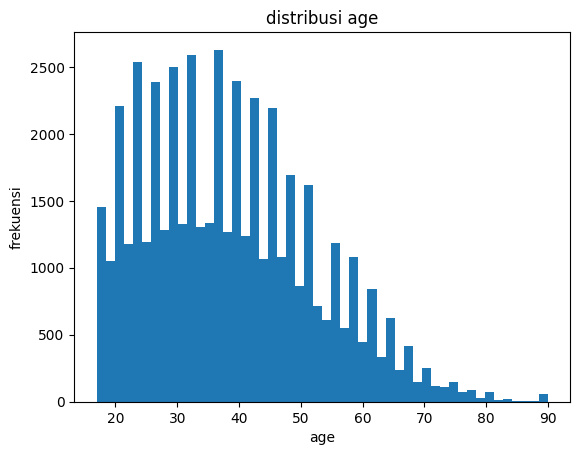

In [47]:
# Jawab 1.1 - Histrogram
plt.figure()
plt.hist(df['age'],bins=50)
plt.title('distribusi age')
plt.xlabel('age')
plt.ylabel('frekuensi')

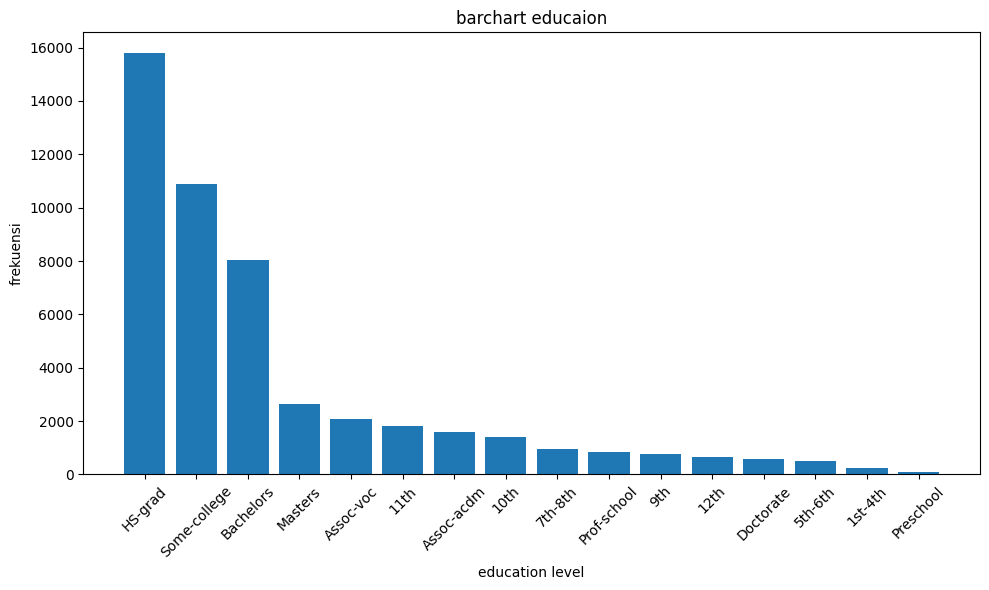

In [59]:
# Jawab 1.2 - Barchart
education_counts = df['education'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(education_counts.index, education_counts.values)
plt.title('barchart educaion')
plt.xlabel('education level')
plt.ylabel('frekuensi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'income')

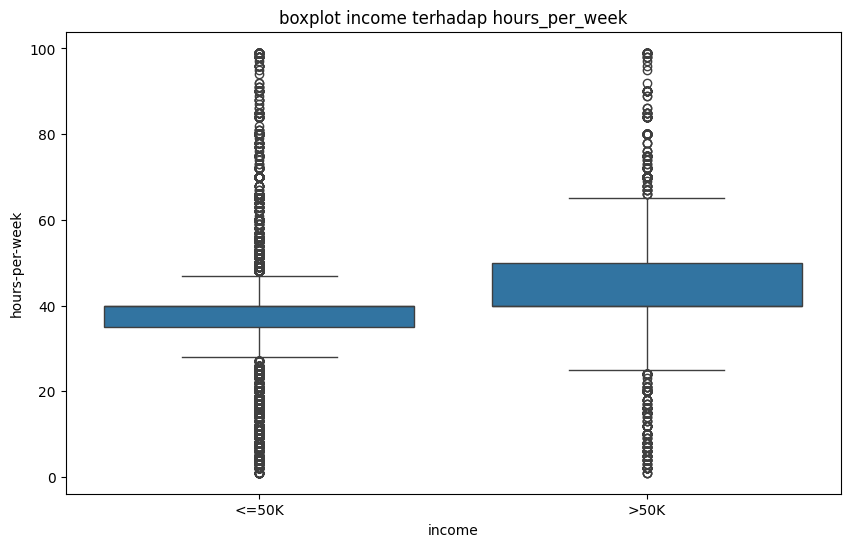

In [69]:
# Jawab 1.3 - Boxplot
#Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot
#(kelompokkan berdasarkan kelompok income)


# df.info()
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('boxplot income terhadap hours_per_week')
plt.xlabel('income')


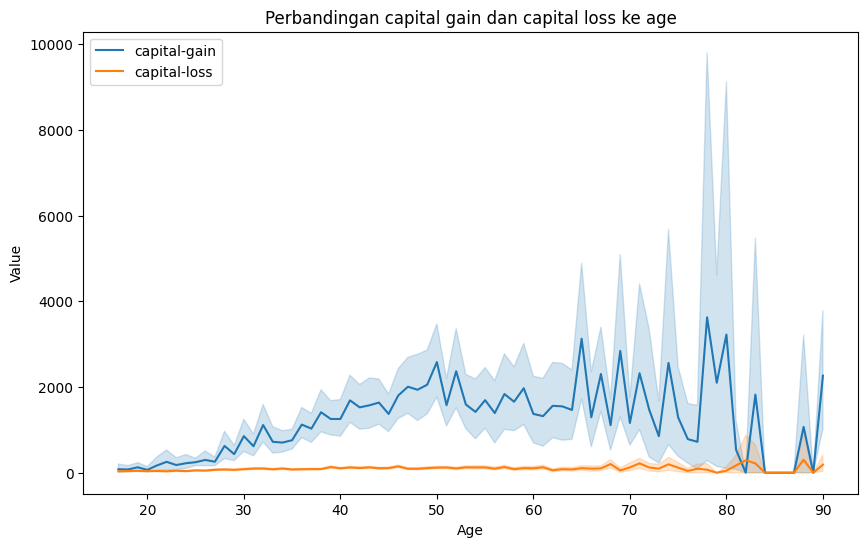

In [82]:
# Jawab 1.4 - Lineplot
#Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss'
#dengan lineplot (1 lineplot 2 data)
plt.figure(figsize=(10, 6))

# Menggunakan kolom 'age' sebagai sumbu x
sns.lineplot(x= 'age', y= 'capital-gain', data=df, label='capital-gain')
sns.lineplot(x= 'age', y= 'capital-loss', data=df, label='capital-loss')

plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Perbandingan capital gain dan capital loss ke age')
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [85]:
# Jawab dengan komentar python

'''
1. fenomena yang terjadi pada distribusi data 'age' adalah mengekor ke kanan (skew right). berarti sebagian besar kelompok usia berada di usia muda sekitar 25-40 tahun

2. jika ada data yang hilang, strategi yang dilakukan dapat mengisi data yang hilang dengan nilai modus, karena melihat dari bentuk dsitribusi yang miring maak akan cocok untuk mengisi dengan nilai yang sering muncul

'''

"\n1. fenomena yang terjadi pada distribusi data 'age' adalah mengekor ke kanan (skew right). berarti sebagian besar kelompok usia berada di usia muda sekitar 25-40 tahun\n\n2. jika ada data yang hilang, strategi yang dilakukan dapat mengisi data yang hilang dengan nilai modus, karena melihat dari bentuk dsitribusi yang miring maak akan cocok untuk mengisi dengan nilai yang sering muncul\n\n"

In [88]:
# 3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

def jum_outlier(df, kolom, grup):
    hitung = {}
    for kategori in df[grup].unique():
        subset = df[df[grup] == kategori][kolom]
        q1 = subset.quantile(0.25)
        q3 = subset.quantile(0.75)
        IQR = q3 - q1
        bawah = q1 - 1.5 * IQR
        atas = q3 + 1.5 * IQR
        outlier = subset[(subset < bawah) | (subset > atas)]
        hitung[kategori] = len(outlier)
    return hitung


hitung = jum_outlier(df, 'hours-per-week', 'income')


for kategori, count in hitung.items():
    print(f"income kategori '{kategori}': {count} outlier pada 'hours-per-week'")


income kategori '<=50K': 11706 outlier pada 'hours-per-week'
income kategori '>50K': 781 outlier pada 'hours-per-week'


# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [103]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
sexin = df[['sex','income']]
sexin.head()

,sex,income
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [105]:
sexin['sex'] = le.fit_transform(df['sex'])
sexin['income'] = le.fit_transform(df['income'])

sexin.head()

/tmp/ipython-input-3485619300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sexin['sex'] = le.fit_transform(df['sex'])
/tmp/ipython-input-3485619300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sexin['income'] = le.fit_transform(df['income'])


,sex,income
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

In [108]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
df['sex'] = le.fit_transform(df['sex'])
df['age'] = le.fit_transform(df['age'])
df['education-num'] = le.fit_transform(df['education-num'])
df['hours-per-week'] = le.fit_transform(df['hours-per-week'])
df['capital-gain'] = le.fit_transform(df['capital-gain'])
df['capital-loss'] = le.fit_transform(df['capital-loss'])
df['income'] = le.fit_transform(df['income'])

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,State-gov,77516,Bachelors,12,Never-married,Adm-clerical,Not-in-family,White,1,27,0,39,United-States,0
1,33,Self-emp-not-inc,83311,Bachelors,12,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,12,United-States,0
2,21,Others,215646,HS-grad,8,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,39,United-States,0
3,36,Others,234721,11th,6,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,39,United-States,0
4,11,Others,338409,Bachelors,12,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,39,Cuba,0


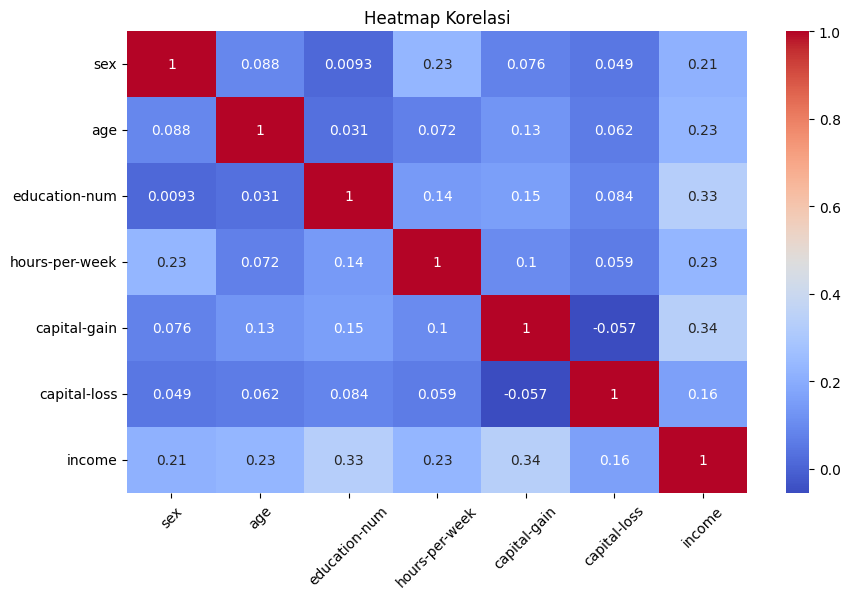

In [114]:
target = ['sex','age','education-num','hours-per-week','capital-gain','capital-loss','income']
corr = df[target].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.xticks(rotation=45)
plt.show()

In [115]:
# Hasil analisis jelaskan pada cell ini

'''
1. variabel 'income' memiliki korelasi positif yang paling kuat dengan 'capital-gain' (0.34), 'education-num' (0.33), dan 'hours-per-week' (0.23). Ini menunjukkan bahwa individu dengan income yang lebih tinggi cenderung memiliki capital gain yang lebih besar, tingkat pendidikan yang lebih tinggi, dan jam kerja per minggu yang lebih banyak.
2. 'sex' memiliki korelasi positif yang moderat dengan 'income' (0.21), menunjukkan ada perbedaan income antara jenis kelamin.
3. 'age' memiliki korelasi positif yang moderat dengan 'income' (0.23), menunjukkan bahwa usia juga berpengaruh pada income.
4. 'capital-loss' memiliki korelasi positif yang lemah dengan 'income' (0.16).
'''

"\n1. variabel 'income' memiliki korelasi positif yang paling kuat dengan 'capital-gain' (0.34), 'education-num' (0.33), dan 'hours-per-week' (0.23). Ini menunjukkan bahwa individu dengan income yang lebih tinggi cenderung memiliki capital gain yang lebih besar, tingkat pendidikan yang lebih tinggi, dan jam kerja per minggu yang lebih banyak.\n2. 'sex' memiliki korelasi positif yang moderat dengan 'income' (0.21), menunjukkan ada perbedaan income antara jenis kelamin.\n3. 'age' memiliki korelasi positif yang moderat dengan 'income' (0.23), menunjukkan bahwa usia juga berpengaruh pada income.\n4. 'capital-loss' memiliki korelasi positif yang lemah dengan 'income' (0.16).\n"

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [124]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


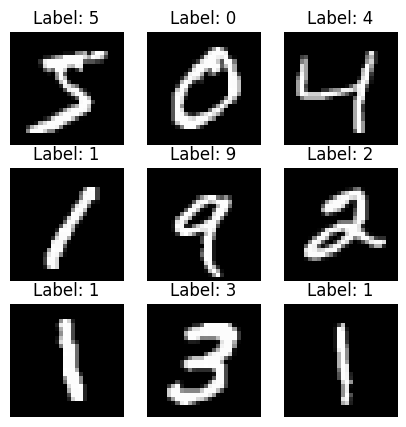

In [125]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Ukuran setelah resize: (10000, 32, 32)


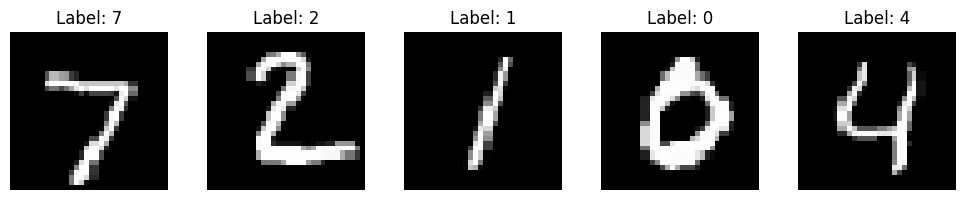

In [127]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
x_test_expanded = np.expand_dims(X_test, axis=-1)

x_test_resized = np.array([
    cv2.resize(img, (32, 32), interpolation=cv2.INTER_NEAREST)
    for img in x_test_expanded
])

x_test_resized_display = x_test_resized.squeeze()

print("Ukuran setelah resize:", x_test_resized.shape)

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)

    plt.imshow(x_test_resized_display[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [129]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
x_test_resized  = x_test_resized.astype('float32') / 255.0

print("nilai piksel citra setelah normalisasi:")
print(x_test_resized[0])

Nilai piksel citra setelah normalisasi:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [131]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

x_test_flattened = x_test_resized.reshape(x_test_resized.shape[0], -1)

print(x_test_flattened.shape)

(10000, 1024)
